In [1]:
%matplotlib inline
%reset

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from py2neo import Graph,authenticate,Relationship,Node
import networkx as nx
import community
import numpy as np
from itertools import groupby
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from PyDictionary import PyDictionary
from collections import Counter
from datetime import datetime
import json
import pickle

import ijson

import sqlite3



folder=''


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
data='../repos/'

Load the dictionaries
------------------------
*d.pkl is the dict of all users

*dUK.pkl is the dictionary of users in the UK

This includes the following fields:

*Gender

*Age

*Ethnicity

*Long Description

*Status Message

*Number of Likes


In [3]:
d=pickle.load(open(data+'d.pkl','rb'))
dUK=pickle.load(open(data+'dUK.pkl','rb'))

Gender Stats
--------------

In [ ]:
plt.xkcd()
df.gender.value_counts().plot(kind='bar')
df.gender.value_counts()['M']/df.gender.value_counts()['F']

In [ ]:
plt.xkcd()
dfUK.gender.value_counts().plot(kind='bar')
dfUK.gender.value_counts()['M']/dfUK.gender.value_counts()['F']

Ethnicity Stats
---------------

In [ ]:
df.ethnic.value_counts()
dfUK.ethnic.value_counts()


In [ ]:
dth=pd.DataFrame(df.groupby(['ethnic','gender']).size())
dthUK=pd.DataFrame(dfUK.groupby(['ethnic','gender']).size())


In [ ]:
plt.xkcd()
df.ethnic.value_counts().plot(kind='pie',figsize=(6, 6))

In [ ]:
plt.xkcd()
dfUK.ethnic.value_counts().plot(kind='pie',figsize=(6, 6))

Age Stats
---------

In [ ]:
plt.xkcd()
df.age.hist(bins=[20,23,26,29, 32,35,38,41,45]).figure

In [ ]:
plt.xkcd()
dfUK.age.hist(bins=[20,23,26,29, 32,35,38,41,45]).figure

In [ ]:
plt.xkcd()

countsM,bins=np.histogram(df[df.gender=='M'].age,bins=[20,25,30,35,40,45,50,55,60,65,70])
countsF,bins=np.histogram(df[df.gender=='F'].age)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.bar(bins[:-1],countsM/max(countsM),width=3)
ax.bar(bins[:-1]+6,countsF/max(countsF),color='r',width=3)
plt.xlabel('age')
plt.ylabel('normalised frequency')

In [ ]:
plt.xkcd()

countsM,bins=np.histogram(dfUK[dfUK.gender=='M'].age)
countsF,bins=np.histogram(dfUK[dfUK.gender=='F'].age)

fig=plt.figure()
ax=fig.add_subplot(111)

ax.bar(bins[:-1],countsM/max(countsM))
ax.bar(bins[:-1]+1,countsF/max(countsF),color='r')
plt.xlabel('age')
plt.ylabel('normalised frequency')

Swipe Stats
-------------

In [176]:
dlikesM=pickle.load(open(data+'dlikesM.pkl','rb'))
dlikesF=pickle.load(open(data+'dlikesF.pkl','rb'))


In [ ]:
plt.xkcd()
countsM,bins=np.histogram(np.log10(list(dlikesM.values())),bins=5)
countsF,binsF=np.histogram(np.log10(list(dlikesF.values())),bins=bins)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(bins[:-1],countsM,width=0.5)
ax.bar(bins[:-1],countsF,color='r',width=0.5)
plt.xlabel('Logarithmic number of likes (base 10)')
plt.ylabel('counts')

In [ ]:
print('max Men likes %s\n'%max(dlikesM.values()))
print('max Women likes %s\n'%max(dlikesF.values()))

print('min Men likes %s\n'%min(dlikesM.values()))
print('min Women likes %s\n'%min(dlikesF.values()))

print('mean Men likes %s\n'%np.mean(list(dlikesM.values())))
print('mean Women likes %s\n'%np.mean(list(dlikesF.values())))

In [ ]:
today='2017-04-01'


In [ ]:
#this function adds number of swipes to each user
trim=db.trim
dlikesMUK={}
dlikesFUK={}
for key in dUK.keys():
    t=trim.find({'memberID':key},{"who_i_liked":1})
    a=trim.find({'memberID':key},{"activeSince":1})
    try:
        dUK[key]['activeSince']= a[0]['activeSince']
    except:
        continue
            
    for tt in t:
        if 'who_i_liked' in tt.keys():
            likes=len(tt['who_i_liked' ])
            if d[key]['gender']=='M':
                dlikesMUK[key]=likes
            else:
                dlikesFUK[key]=likes
                    


In [ ]:
pickle.dump(dlikesMUK,open(data+'dlikesMUK.pkl','wb'))
pickle.dump(dlikesFUK,open(data+'dlikesFUK.pkl','wb'))

In [ ]:
plt.xkcd()
countsM,bins=np.histogram(np.log10(list(dlikesMUK.values())),bins=5)
countsF,binsF=np.histogram(np.log10(list(dlikesFUK.values())),bins=bins)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(bins[:-1],countsM,width=0.5)
ax.bar(bins[:-1],countsF,color='r',width=0.25)
plt.xlabel('Logarithmic number of likes (base 10)')
plt.ylabel('counts')

In [ ]:
print('max Men likes %s\n'%max(dlikesMUK.values()))
print('max Women likes %s\n'%max(dlikesFUK.values()))

print('min Men likes %s\n'%min(dlikesMUK.values()))
print('min Women likes %s\n'%min(dlikesFUK.values()))

print('mean Men likes %s\n'%np.mean(list(dlikesMUK.values())))
print('mean Women likes %s\n'%np.mean(list(dlikesFUK.values())))

In [ ]:
def get_age_age(d,dictM,dictF):
    for key in d.keys():
        t=trim.find({'memberID':key},{'who_i_liked':1})
        for tt in t:
            if d[key]['gender']=='M':
                l=[]
                if 'who_i_liked' in tt.keys():
                    for mid in tt['who_i_liked']:
                        if mid in d.keys(): #filtered out nonUK people and international lurve is a thing
                            l.append(d[mid]['age'])
                dictM[d[key]['age']]=l

            if d[key]['gender']=='F':
                if 'who_i_liked' in tt.keys():
                    l=[]
                    for mid in tt['who_i_liked']:
                        if mid in d.keys():
                            l.append(d[mid]['age'])
                dictF[d[key]['age']]=l
    return dictM,dictF

In [ ]:
#age vs age swipes for men and women
agesM={}
agesF={}
agesM,agesF=get_age_age(d,agesM,agesF)



In [ ]:
pickle.dump(agesM,open(data+'agesM.pkl','wb'))
pickle.dump(agesF,open(data+'agesF.pkl','wb'))

In [ ]:
agesM=pickle.load(open(data+'agesM.pkl','rb'))
agesF=pickle.load(open(data+'agesF.pkl','rb'))

In [ ]:
agesMUK={}
agesFUK={}
agesMUK,agesFUK=get_age_age(dUK,agesMUK,agesFUK)

In [ ]:
pickle.dump(agesMUK,open(data+'agesMUK.pkl','wb'))
pickle.dump(agesFUK,open(data+'agesFUK.pkl','wb'))

In [ ]:
def get_trends(d,dict1):
    for age in dict1.keys():
        ageMean=np.mean(dict1[age])
        ageSdev=np.std(dict1[age])
        z=Counter()
        for a in dict1[age]:
            z[a]+=1
        d[age]={}
        d[age]['stats']=(ageMean,ageSdev)
        d[age]['counts']=z
    return d

In [ ]:
agesMUK=pickle.load(open(data+'agesMUK.pkl','rb'))
agesFUK=pickle.load(open(data+'agesFUK.pkl','rb'))

In [ ]:
agesTrendF={}
agesTrendF=get_trends(agesTrendF,agesF)
agesTrendM={}
agesTrendM=get_trends(agesTrendM,agesM)

agesTrendFUK={}
agesTrendFUK=get_trends(agesTrendFUK,agesFUK)
agesTrendMUK={}
agesTrendMUK=get_trends(agesTrendMUK,agesMUK)

    

In [ ]:
pickle.dump(agesTrendM,open(data+'agesTrendM.pkl','wb'))
pickle.dump(agesTrendF,open(data+'agesFTrend.pkl','wb'))

pickle.dump(agesTrendMUK,open(data+'agesTrendMUK.pkl','wb'))
pickle.dump(agesTrendFUK,open(data+'agesFTrendUK.pkl','wb'))

In [ ]:
def plt_scatter(d):
    plt.xkcd()
    for age in d.keys():
        if age>0 and age<60:
            y=list(d[age]['counts'].keys())
            y=[yy for yy in y if yy>0 and yy<60]
            s=list(d[age]['counts'].values())
            plt.scatter([age]*len(y),y,s=s)
        
def plt_trend(d):
    x=[]
    m=[]
    mp=[]
    mm=[]

    for age in d.keys():
        if age>20 and age<60:
            x.append(age)
            m.append(d[age]['stats'][0])
            mp.append(d[age]['stats'][0]+d[age]['stats'][1])
            mm.append(d[age]['stats'][0]-d[age]['stats'][1])
    s,b = np.polyfit(x, m, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r')
    s,b = np.polyfit(x, mp, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r--')
    s,b = np.polyfit(x, mm, 1)
    plt.plot(x,[s*float(c)+b for c in x],'r--')

    print('slope is %s with an intercept of %s'%(s,b))

In [ ]:
plt_scatter(agesTrendF)
plt_trend(agesTrendF)
plt.xlabel('Female Age')
plt.ylabel('Male Age')
plt.axis([20,60,20,60])




In [ ]:
plt_scatter(agesTrendM)
plt_trend(agesTrendM)
plt.ylabel('Female Age')
plt.xlabel('Male Age')
plt.axis([20,60,20,60])



    

In [ ]:
plt_scatter(agesTrendMUK)
plt_trend(agesTrendMUK)
plt.ylabel('Female Age')
plt.xlabel('Male Age')
plt.axis([20,60,20,60])


In [ ]:
plt_scatter(agesTrendFUK)
plt_trend(agesTrendFUK)
plt.xlabel('Female Age')
plt.ylabel('Male Age')
plt.axis([20,60,20,60])



In [ ]:
d2=pickle.load(open(data+'d2.pkl','rb'))
bad_keys=[]
for key in d2.keys():
    if d2[key]['activeSince']==0:
        bad_keys.append(key)

In [ ]:
trim=db.trim
for key in bad_keys:
    t=trim.find({'memberID':key},{"activeSince":1})
    try:
        d2[key]['activeSince']=t[0]['activeSince']
    except:
        d2[key]['activeSince']=0
    
    

In [ ]:
bad_keys=[]
for key in d2.keys():
    if d2[key]['activeSince']==0:
        bad_keys.append(key)
        
len(bad_keys)

In [73]:
today=datetime.strptime('2017-04-28','%Y-%m-%d')
dUK2={}
for key in dUK.keys():
    if key in dUK.keys() and 'activeSince' in dUK[key].keys():
        a=dUK[key]['activeSince']
        if a==0:
            a=today
        else:
            a=datetime.strptime(a,'%Y-%m-%d')
        a=(today-a).days
        if a==0:
            a=0
        dUK2[key]=dUK[key]
        dUK2[key]['daysActive']=a

In [74]:
dUK=dUK2

In [75]:
pickle.dump(dUK2,open(data+'dUK2.pkl','wb'))

In [7]:
dUK=pickle.load(open(data+'dUK2.pkl','rb'))

Likes Vs. RealLikes
----------------------

In [38]:
dreal=pickle.load(open(data+'dreal.pkl','rb'))

In [44]:
c,b=np.histogram(pUK['realLen'][pUK.gender=='F'],bins=50)
cm,bm=np.histogram(pUK['realLen'][pUK.gender=='M'],bins=b)
cl,bl=np.histogram(pUK['numLikes'][pUK.gender=='F'],bins=b)
clm,blm=np.histogram(pUK['numLikes'][pUK.gender=='M'],bins=b)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


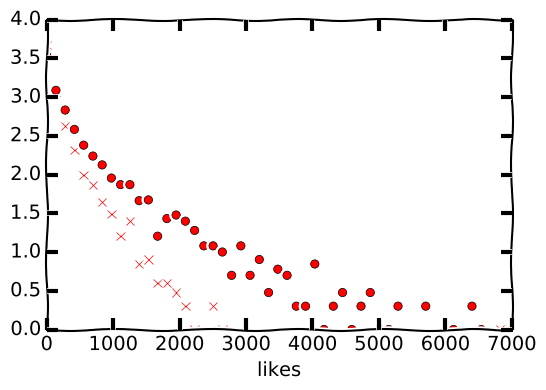

In [45]:
plt.xkcd()
plt.plot(b[:-1],np.log10(c),'rx')
plt.plot(b[:-1],np.log10(cl),'ro')
plt.xlabel('likes')

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


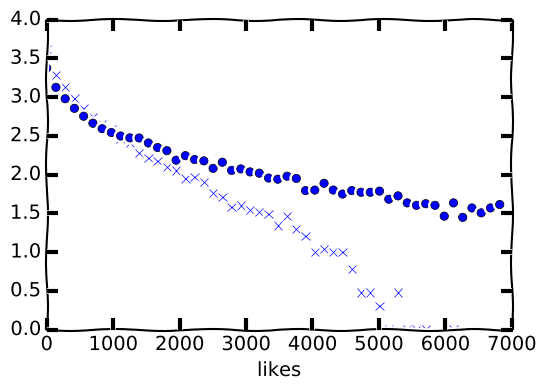

In [46]:
plt.xkcd()
plt.plot(b[:-1],np.log10(cm),'x')
plt.plot(b[:-1],np.log10(clm),'bo')
plt.xlabel('likes')

Graph Stuff
======
Find out who passed me (this data is not in the JSON)

Find communities within the data

Do this all with networkx

In [ ]:
doc=csv.reader(open(data+'alikesb.csv','r')) #this is created in a seperate python module
doc=csv.reader(open(data+'alikesb.csv','r'))
G=nx.DiGraph() #a directed graph
G.clear()
for row in doc:
    G.add_nodes_from(row)
    G.add_edge(row[0],row[1])


In [ ]:
n=G.nodes()
for key in dUK.keys():
    if key in n:
        pop=len(G.predecessors(key)) #find the nodes pointing to the key node
        dUK[key]['pop']=pop

In [ ]:
max_likes=300 #filter out people who liked more than 300 otherwise, crash your laptop, see if I care

In [ ]:
doc=csv.reader(open(data+'apassedb.csv','r'))
G2=nx.DiGraph()
G2.clear()
for row in doc:
    numLikes=dUK[row[0]]['numLikes'] 
    if numLikes<max_likes:
        G2.add_nodes_from(row)
        G2.add_edge(row[0],row[1])


In [ ]:
n=G2.nodes()
for key in dUK.keys():
    if key in n:
        pop=len(G2.predecessors(key))#find people that passed me
        if 'pop' in dUK[key].keys():
            dUK[key]['impression']=dUK[key]['pop']+pop

In [ ]:
doc=csv.reader(open(data+'alikesb.csv','r'))
G=nx.Graph() #need to do this to do the community stuff
G.clear()
for row in doc:
    if dUK[row[0]]['numLikes']<300:
        G.add_nodes_from(row)
        G.add_edge(row[0],row[1])


In [ ]:
#community partitions
partitions1 = community.best_partition(G)

In [ ]:
partitions = [(k, v) for k, v in partitions1.items()]

sorted_partitions = sorted(partitions, key=lambda tup: tup[1])
communities = groupby(sorted_partitions, key=lambda tup: tup[1])

mod = community.modularity(partitions1,G)


In [ ]:
comm={}
for c, u in communities:
    print(c)
    u = list(u)
    u = [y[0] for y in u]
    comm[c] = u
    print('Community %s has %s members\n' % (c, len(u)))
    #file.write('----------------------------\n')

    #for uu in u:
     #   file.write('%s\n' % ' '.join(uu.split('_')))

    #file.write('-----------------------------\n')

In [ ]:
#invert dictionary
peeps={}
for key in comm.keys():
    people=comm[key]
    for p in people:
        peeps[p]=key

In [ ]:
comm_ethnic={}
for key in comm.keys():
    l=[]
    for p in comm[key]:
        eth=dUK[p]['ethnic']
        l.append(eth)
    comm_ethnic[key]=l

comm_age={}

for key in comm.keys():
    l=[]
    for p in comm[key]:
        age=dUK[p]['age']
        l.append(age)
    comm_age[key]=(np.mean(l),np.sqrt(np.var(l)))

In [ ]:
comm_age_ethnic={}
for key in comm.keys():
    comm_age_ethnic[key]={}
    for p in comm[key]:

        typ=dUK[p]['ethnic']
        if typ in comm_age_ethnic[key].keys():
            age=dUK[p]['age']
            l.append(age)
        else:
            age=dUK[p]['age']
            l=[age]
        comm_age_ethnic[key][typ]=l
    for typ in comm_age_ethnic[key].keys():
        comm_age_ethnic[key][typ]=(np.mean(comm_age_ethnic[key][typ]),np.sqrt(np.var(comm_age_ethnic[key][typ])))
    comm_age_ethnic[key]['allStats']=comm_age[key]
            

In [ ]:
comm_age_ethnic_gender={}
for key in comm.keys():
    comm_age_ethnic_gender[key]={}
    for p in comm[key]:

        typ=dUK[p]['ethnic']
        g=dUK[p]['gender']
        if g=='F':
            if 'F' not in comm_age_ethnic_gender[key].keys():
                comm_age_ethnic_gender[key]['F']={}
            if typ in comm_age_ethnic_gender[key]['F'].keys():
                age=dUK[p]['age']
                l.append(age)
            else:
                age=dUK[p]['age']
                l=[age]
               
                
            comm_age_ethnic_gender[key]['F'][typ]=l
        else:
            if 'M' not in comm_age_ethnic_gender[key].keys():
                
                comm_age_ethnic_gender[key]['M']={}
                
            
            
            if typ in comm_age_ethnic_gender[key]['M'].keys():
                age=dUK[p]['age']
                l.append(age)
            else:
                age=dUK[p]['age']
                l=[age]

            comm_age_ethnic_gender[key]['M'][typ]=l 

                   
    for gen in comm_age_ethnic_gender[key].keys():
        for typ in comm_age_ethnic_gender[key][gen].keys():
            l=[ll for ll in comm_age_ethnic_gender[key][gen][typ] if type(ll)==int]
            comm_age_ethnic_gender[key][gen][typ]=(np.mean(l),np.sqrt(np.var(l)))
        #comm_age_ethnic_gender[key][gen]['allStats']=comm_age[key][gen]
          

NLP Magic
=====

In [4]:
#pUK=pickle.load(open(data+'pUK.pkl','rb'))
dUK=pickle.load(open(data+'dUK.pkl','rb'))
pUK=pd.DataFrame.from_dict(dUK,orient='index')

In [5]:
pUK.columns

Index(['pop', 'age', 'impression', 'SM', 'activeSince', 'LD', 'country',
       'gender', 'ethnic', 'numLikes'],
      dtype='object')

In [6]:
pUK=pUK[pUK.impression!=0]

In [7]:
pUK=pUK.dropna()

In [8]:
def get_len(sm):
    if sm is not None:
        return len(sm)
    else:
        return 0

In [9]:
pUK['SMlen']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['SMlen']=pUK['SM'].apply(get_len)

pUK['LDlen']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['LDlen']=pUK['LD'].apply(get_len)

In [10]:
dreal=pickle.load(open(data+'dreal.pkl','rb'))

In [11]:
def get_reals(d):
    return dreal[d]['realLikes']

In [12]:
pUK['real']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['real']=pUK.index.map(get_reals)


In [13]:
def real_len(d):
    if d==0:
        return 0
    else:
        return len(d)

In [14]:
pUK['realLen']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['realLen']=pUK['real'].apply(real_len)


In [16]:
pUK['SM'][pUK['SM'].isnull()]='XXXXMONKEYSXXXX'

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
pUK['LD'][pUK['LD'].isnull()]='XXXXMONKEYSXXXX'

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english',max_features=50)
tfLD = TfidfVectorizer(analyzer='word', min_df=0, stop_words='english',max_features=100)



tfidf_SMUK = tf.fit_transform(pUK['SM'])
tfidf_LDUK = tfLD.fit_transform(pUK['LD'])

In [21]:
feature_names = tf.get_feature_names()

i = 0
top_words = {}
max_words=1
for row in tfidf_SMUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_SM=top_words

top_SMList=list(set([l for b in list(top_SM.values()) for l in b]))

feature_names = tfLD.get_feature_names()


i = 0
top_words = {}
max_words=10
for row in tfidf_LDUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_LD=top_words
top_LDList=list(set([l for b in list(top_LD.values()) for l in b]))



In [22]:
top_SM=top_SMList
top_LD=top_LDList

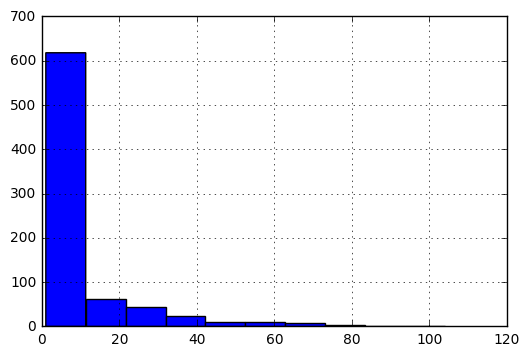

In [23]:
pUK['realLen'][pUK.gender=='F'].value_counts().hist()

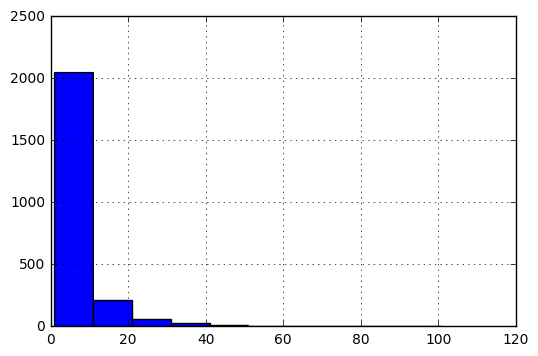

In [24]:
pUK['realLen'][pUK.gender=='M'].value_counts().hist()

In [25]:
dlikesM=pickle.load(open(data+'dlikesM.pkl','rb'))
dlikesF=pickle.load(open(data+'dlikesF.pkl','rb'))

In [26]:
dlikes={**dlikesM,**dlikesF}

In [27]:
pUK['likes']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)

In [28]:
today=datetime.strptime('2017-04-28','%Y-%m-%d')

def get_active_since(mid):
    if 'activeSince' in dUK[mid].keys():
        a=dUK[mid]['activeSince']
        a=datetime.strptime(a,'%Y-%m-%d')
        a=(today-a).days
        return a
    else:
        return 0

In [30]:
pUK['activeSince']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['activeSince']=pUK.index.map(get_active_since)

In [31]:
pUK=pUK[pUK['activeSince']!=0]

In [33]:
def add_likes(mid):
    if mid in dlikes.keys():
        return dlikes[mid]
    else:
        return 0

In [34]:
pUK['likes']=pUK.index.map(add_likes)

In [35]:
def filter_top(t):
    words=[]
    if t is not None and len(t)>0 :
        tt=t.split(' ')

       
        for ttt in tt:
            if ttt in top_SM:
                words.append(ttt)
        return words
def filter_topLD(t):
    words=[]
    if t is not None and len(t)>0:
        tt=t.split(' ')

       
        for ttt in tt:
            if ttt in top_LD:
                words.append(ttt)
        return words

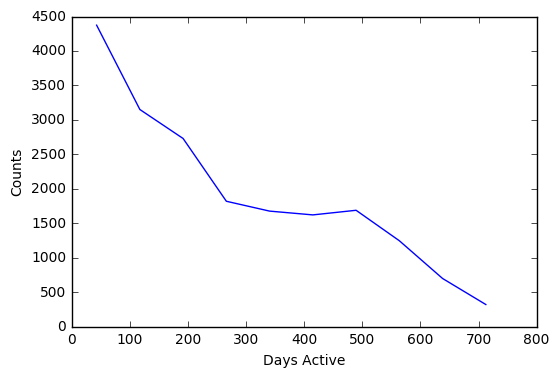

In [36]:
c,b=np.histogram(pUK['activeSince'])
plt.plot(b[:-1],c)
plt.xlabel('Days Active')
plt.ylabel('Counts')

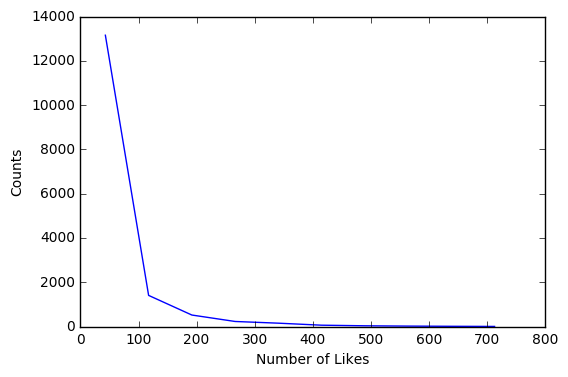

In [37]:
c,p=np.histogram(pUK['likes'][(pUK['activeSince']<500)])
plt.plot(b[:-1],c)
plt.xlabel('Number of Likes')
plt.ylabel('Counts')

In [38]:
pUK['SM']=pUK['SM'].apply(filter_top)
pUK['LD']=pUK['LD'].apply(filter_topLD)

In [39]:
def get_pop(p):
    if 'pop' in dUK[p].keys():
        return dUK[p]['pop']
    else:
        return 0

In [40]:
pUK['pop']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['pop']=pUK.index.map(get_pop)
pUK['popNorm']=pUK['pop']/pUK['impression']*100 #replace with normalised impression stuff

Back to the Community stuff
===============

In [ ]:
comm_avg_pop={}

for key in comm.keys():
    typ=Counter()
    comm_avg_pop[key]={}
    for p in comm[key]:
        if p in pUK.index:
            popularity=pUK.ix[p]['popNorm']
            age=dUK[p]['age']
            eth=dUK[p]['ethnic']
            g=dUK[p]['gender']
            #sm=pUK.ix[p]['SM']
            #ld=pUK.ix[p]['LD']
            likes=pUK.ix[p]['likes']
            ldLen=pUK.ix[p]['LDlen']
            smLen=pUK.ix[p]['SMlen']
            typ[eth]+=1
            if g in comm_avg_pop[key].keys():
                #comm_avg_pop[key][g]['SM'].append(sm)
                #comm_avg_pop[key][g]['LD'].append(ld)
                comm_avg_pop[key][g]['ldLen'].append(ldLen)
                comm_avg_pop[key][g]['smLen'].append(smLen)
                comm_avg_pop[key][g]['pop'].append(popularity)
            else:
                comm_avg_pop[key][g]={}
                #comm_avg_pop[key][g]['SM']=[sm]
                #comm_avg_pop[key][g]['LD']=[ld]
                comm_avg_pop[key][g]['ldLen']=[ldLen]
                comm_avg_pop[key][g]['smLen']=[smLen]
                comm_avg_pop[key][g]['pop']=[popularity]
                    
            

In [ ]:
comm_avg_len_pop={}
for c in comm_avg_pop.keys():
    avgLDLenF=np.mean(comm_avg_pop[c]['F']['ldLen'])
    avgsmLenF=np.mean(comm_avg_pop[c]['F']['smLen'])
    avgPopF=np.mean(comm_avg_pop[c]['F']['pop'])
    comm_avg_len_pop[c]={}
    comm_avg_len_pop[c]['F']=[('ld',avgLDLenF),('sm',avgsmLenF),('pop',avgPopF)]
    avgLDLenF=np.mean(comm_avg_pop[c]['M']['ldLen'])
    avgsmLenF=np.mean(comm_avg_pop[c]['M']['smLen'])
    avgPopF=np.mean(comm_avg_pop[c]['M']['pop'])
    
    comm_avg_len_pop[c]['M']=[('ld',avgLDLenF),('sm',avgsmLenF),('pop',avgPopF)]

In [41]:
full_comm={}

full_comm['F']={}
full_comm['M']={}
for c in comm.keys():
    print(c)
    
    
    full_comm['F'][c]={}
    full_comm['M'][c]={}
    full_comm['M'][c]['age']=[]
    full_comm['F'][c]['age']=[]
    
    for p in comm[c]:
        full_comm[dUK[p]['gender']][c]['age'].append(dUK[p]['age'])
    full_comm['M'][c]['age']=np.mean(full_comm['M'][c]['age'])
    full_comm['F'][c]['age']=np.mean(full_comm['F'][c]['age'])
    full_comm['F'][c]['sm']=comm_avg_len_pop[c]['F'][1][1]
    full_comm['F'][c]['ld']=comm_avg_len_pop[c]['F'][0][1]
    full_comm['F'][c]['pop']=comm_avg_len_pop[c]['F'][2][1]
    full_comm['M'][c]['sm']=comm_avg_len_pop[c]['M'][1][1]
    full_comm['M'][c]['ld']=comm_avg_len_pop[c]['M'][0][1]
    full_comm['M'][c]['pop']=comm_avg_len_pop[c]['M'][2][1]
    
    
        
    

In [ ]:
pFULLF=pd.DataFrame.from_dict(full_comm['F'],orient='index')
pFULLM=pd.DataFrame.from_dict(full_comm['M'],orient='index')

In [ ]:
#get women SM and LD for each community and then for the men
SM={}
for c in comm.keys():
    for p in comm[c]:
        if dUK[p]['gender']=='M':
            if str(c)+'M' in SM.keys():
                if dUK[p]['SM'] is not None:
                    SM[str(c)+'M']=SM[str(c)+'M']+' '+dUK[p]['SM']
            else:
                if dUK[p]['SM'] is not None:
                    SM[str(c)+'M']=dUK[p]['SM']
        else:
            if str(c)+'F' in SM.keys():
                if dUK[p]['SM'] is not None:
                    SM[str(c)+'F']=SM[str(c)+'F']+' '+dUK[p]['SM']
            else:
                if dUK[p]['SM'] is not None:
                    SM[str(c)+'F']=dUK[p]['SM']

In [ ]:
#get women SM and LD for each community and then for the men
LD={}
for c in comm.keys():
    for p in comm[c]:
        if dUK[p]['gender']=='M':
            if str(c)+'M' in LD.keys():
                if dUK[p]['LD'] is not None:
                    LD[str(c)+'M']=LD[str(c)+'M']+' '+dUK[p]['LD']
            else:
                if dUK[p]['LD'] is not None:
                    LD[str(c)+'M']=dUK[p]['LD']
        else:
            if str(c)+'F' in LD.keys():
                if dUK[p]['LD'] is not None:
                    LD[str(c)+'F']=LD[str(c)+'F']+' '+dUK[p]['LD']
            else:
                if dUK[p]['LD'] is not None:
                    LD[str(c)+'F']=dUK[p]['LD']

In [ ]:
df=pd.DataFrame.from_dict(SM,orient='index')
dfLD=pd.DataFrame.from_dict(LD,orient='index')

tfidf_SMUK = tf.fit_transform(df[0])
tfidf_LDUK = tfLD.fit_transform(dfLD[0])

feature_names = tf.get_feature_names()

i = 0
top_words = {}
max_words=1
for row in tfidf_SMUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_SM=top_words

top_SMList=list(set([l for b in list(top_SM.values()) for l in b]))


feature_names = tfLD.get_feature_names()


i = 0
top_words = {}
max_words=10
for row in tfidf_LDUK.todense():
    task = row.tolist()[0]
    top_words[i] = [feature_names[n] for n in list(range(0, len(task))) if task[n] != 0]

    i += 1
top_LD=top_words
top_LDList=list(set([l for b in list(top_LD.values()) for l in b]))

top_SM=top_SMList
top_LD=top_LDList

In [42]:
counts,bins=np.histogram(pUK['pop'],bins=[50,100,150,200,250,300,350,400,450,500,550])
pcounts=counts/sum(counts)*100
min_likes=100

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


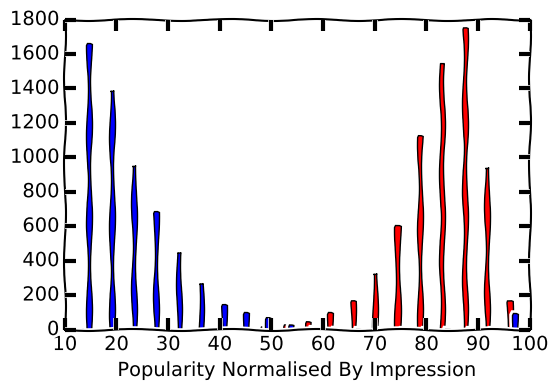

In [309]:
plt.xkcd()
countsPop,binsPopF=np.histogram(pUK['popNorm'][pUK.gender=='F'],bins=20)
plt.bar(binsPopF[:-1],countsPop,color='r')
countsPop,binsPop=np.histogram(pUK['popNorm'][pUK.gender=='M'],bins=binsPopF)
plt.bar(binsPopF[:-1]+1,countsPop)
plt.xlabel('Popularity Normalised By Impression')

In [324]:
#popular vs unpopular women
print('Average age of popular women is %s while the unpopular ones is %s'%
      (np.mean(pUK['age'][(pUK.gender=='F') & (pUK.popNorm>90)]),
       np.mean(pUK['age'][(pUK.gender=='F') & (pUK.popNorm<60)])))

Average age of popular women is 30.4245283019 while the unpopular ones is 29.5113636364


In [367]:
#popular vs unpopular women
print('Average age of popular men is %s while the unpopular ones is %s'%
      (np.mean(pUK['age'][(pUK.gender=='M') & (pUK.popNorm>90)]),
       np.mean(pUK['age'][(pUK.gender=='M') & (pUK.popNorm<20)])))

Average age of popular men is 29.2580645161 while the unpopular ones is 29.4554171718


In [369]:
print('There are %s ethnicities in the popular set and %s in the unpopular set'%
     (len(set(pUK['ethnic'][(pUK.gender=='F') & (pUK.popNorm>90)])),
     len(set(pUK['ethnic'][(pUK.gender=='F') & (pUK.popNorm<60)]))))

There are 19 ethnicities in the popular set and 9 in the unpopular set


In [370]:
print('There are %s ethnicities in the popular set and %s in the unpopular set'%
     (len(set(pUK['ethnic'][(pUK.gender=='M') & (pUK.popNorm>90)])),
     len(set(pUK['ethnic'][(pUK.gender=='M') & (pUK.popNorm<20)]))))

There are 11 ethnicities in the popular set and 21 in the unpopular set


In [371]:
set(pUK['ethnic'][(pUK.gender=='M') & (pUK.popNorm<20)]).difference(set(pUK['ethnic'][(pUK.gender=='M') & (pUK.popNorm>90)]))

{'Afghan',
 'African American',
 'Caucasian/White',
 'Far East Asian',
 'Hispanic',
 'Indonesian',
 'Iraqi',
 'Kurdish',
 'Malaysian',
 'Moroccan'}

In [372]:
print('Popular women describe themselves in %s words and unpopular ones in %s'%
     (np.mean(pUK['LDlen'][(pUK.gender=='F') & (pUK.popNorm>90)]),
     np.mean(pUK['LDlen'][(pUK.gender=='F') & (pUK.popNorm<60)])))

Popular women describe themselves in 545.423899371 words and unpopular ones in 621.215909091


In [374]:
print('Popular men describe themselves in %s words and unpopular ones in %s'%
     (np.mean(pUK['LDlen'][(pUK.gender=='M') & (pUK.popNorm>90)]),
     np.mean(pUK['LDlen'][(pUK.gender=='M') & (pUK.popNorm<20)])))

Popular men describe themselves in 210.731182796 words and unpopular ones in 529.398214483


In [328]:
print('Popular women use %s in their status message while unpopular women use %s'%
     (np.mean(pUK['SMlen'][(pUK.gender=='F') & (pUK.popNorm>90)]),
     np.mean(pUK['SMlen'][(pUK.gender=='F') & (pUK.popNorm<60)])))

Popular women use 24.4452830189 in their status message while unpopular women use 23.6022727273


In [375]:
print('Popular men use %s in their status message while unpopular men use %s'%
     (np.mean(pUK['SMlen'][(pUK.gender=='M') & (pUK.popNorm>90)]),
     np.mean(pUK['SMlen'][(pUK.gender=='M') & (pUK.popNorm<20)])))

Popular men use 20.3010752688 in their status message while unpopular men use 25.9976854403


In [329]:
print('Popular women like %s men while unpopular women like %s'%
     (np.mean(pUK['numLikes'][(pUK.gender=='F') & (pUK.popNorm>90)]),
     np.mean(pUK['numLikes'][(pUK.gender=='F') & (pUK.popNorm<60)])))

Popular women like 172.678616352 men while unpopular women like 353.545454545


In [377]:
print('Popular men like %s women while unpopular men like %s'%
     (np.mean(pUK['numLikes'][(pUK.gender=='M') & (pUK.popNorm>90)]),
     np.mean(pUK['numLikes'][(pUK.gender=='M') & (pUK.popNorm<20)])))

Popular men like 56.1935483871 women while unpopular men like 1976.87754877


In [335]:
pUK['LD']=pUK['LD'].map(' '.join)

In [380]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['LD'][(pUK.gender=='F')&(pUK.popNorm>90)])


In [381]:
z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))

In [382]:
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]

In [383]:
print('Popular women have these top 10 words %s'%z[0:10])

Popular women have these top 10 words ['looking', 'like', 'family', 'love', 'good', 'time', 'life', 'enjoy', 'person', 'know']


In [384]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['LD'][(pUK.gender=='F')&(pUK.popNorm<60)])


In [385]:
z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))

In [386]:
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]

In [387]:
print('Unpopular women have these top 10 words %s'%z[0:10])

Unpopular women have these top 10 words ['love', 'like', 'looking', 'good', 'family', 'enjoy', 'life', 'time', 'know', 'want']


In [388]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['LD'][(pUK.gender=='M')&(pUK.popNorm<20)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('Unpopular men have these top 10 words %s'%z[0:10])

Unpopular men have these top 10 words ['like', 'looking', 'family', 'good', 'love', 'life', 'know', 'time', 'person', 'going']


In [389]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['LD'][(pUK.gender=='M')&(pUK.popNorm>90)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('Popular men have these top 10 words %s'%z[0:10])

Popular men have these top 10 words ['like', 'love', 'person', 'looking', 'good', 'life', 'family', 'time', 'know', 'just']


In [391]:
from sklearn.feature_extraction.text import CountVectorizer

pUK['SM']=pUK['SM'].map(' '.join)
#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['SM'][(pUK.gender=='M')&(pUK.popNorm<20)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('Unpopular men have these top 10 words %s'%z[0:10])

Unpopular men have these top 10 words ['looking', 'life', 'like', 'love', 'good', 'best', 'know', 'make', 'partner', 'half']


In [392]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['SM'][(pUK.gender=='M')&(pUK.popNorm>90)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('Popular men have these top 10 words %s'%z[0:10])

Popular men have these top 10 words ['life', 'happy', 'marriage', 'guy', 'just', 'look', 'looking', 'loving', 'nice', 'right']


In [393]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['SM'][(pUK.gender=='F')&(pUK.popNorm>90)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('Popular women have these top 10 words %s'%z[0:10])

Popular women have these top 10 words ['life', 'looking', 'love', 'time', 'just', 'good', 'half', 'right', 'best', 'make']


In [394]:
from sklearn.feature_extraction.text import CountVectorizer

#texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer()
cv_fit=cv.fit_transform(pUK['SM'][(pUK.gender=='F')&(pUK.popNorm<60)])

z=list(zip(cv.get_feature_names(),
    np.asarray(cv_fit.sum(axis=0)).ravel()))
z.sort(key = lambda t: t[1],reverse=True)
z=[zz[0] for zz in z]
print('UnPopular women have these top 10 words %s'%z[0:10])

UnPopular women have these top 10 words ['know', 'looking', 'love', 'honest', 'journey', 'like', 'new', 'say', 'smile', 'think']


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


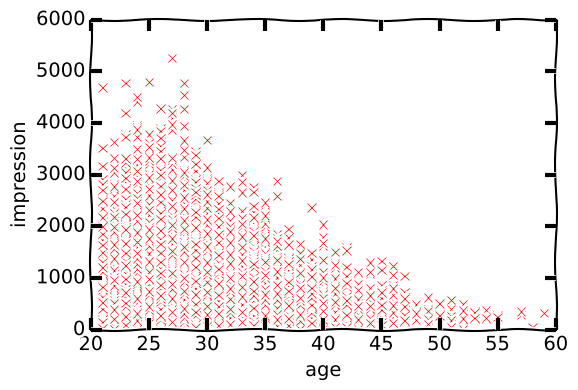

In [400]:
plt.plot(pUK['age'][pUK.gender=='F'],pUK['impression'][pUK.gender=='F'],'rx')
plt.xlabel('age')
plt.ylabel('impression')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Humor Sans', 'Comic Sans MS'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


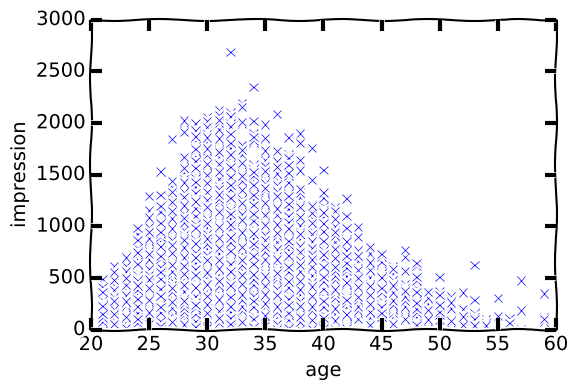

In [398]:
plt.plot(pUK['age'][pUK.gender=='M'],pUK['impression'][pUK.gender=='M'],'x')
plt.xlabel('age')
plt.ylabel('impression')

In [176]:
ms=np.sqrt(np.std(pUK['popNorm'][pUK['gender']=='M']))+np.mean(pUK['popNorm'][pUK['gender']=='M'])
m=np.mean(pUK['popNorm'][pUK['gender']=='M'])

print('mean is %s and with the std is %s'%(m,ms))



mean is 15.4874621906 and with the std is 19.198966691


In [177]:
ms=np.sqrt(np.std(pUK['popNorm'][pUK['gender']=='F']))+np.mean(pUK['popNorm'][pUK['gender']=='F'])
m=np.mean(pUK['popNorm'][pUK['gender']=='F'])
print('mean is %s and with the std is %s'%(m,ms))


mean is 84.2572699198 and with the std is 87.1104536804


In [180]:
len(pUK[(pUK.target>0)&(pUK.gender=='F')])

3661

In [181]:
len(pUK[(pUK.target>0)&(pUK.gender=='M')])

4873

In [182]:
np.mean(pUK['popNorm'][pUK['gender']=='F'])

84.25726991984294

In [183]:
def concat_SM(sm):
    new_sm=[]
    if sm is not None:
        if len(sm)!=0:
            for t in sm:
                new_sm.append('SM_'+t)
    return new_sm
def concat_LD(sm):
    new_sm=[]
    if sm is not None:
        if len(sm)!=0:
            for t in sm:
                new_sm.append('LD_'+t)
    return new_sm
                

In [184]:
pUK['SM']=pUK['SM'].apply(concat_SM)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [185]:
pUK['LD']=pUK['LD'].apply(concat_LD)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [186]:
colSM=pUK['SM'].str.join('|').str.get_dummies()
colLD=pUK['LD'].str.join('|').str.get_dummies()
colEth=pUK['ethnic'].str.get_dummies()
countAge,binsAge=np.histogram(pUK['age'],bins=[20,25,30,35,40,45,50,55,60])
countSM,binsSM=np.histogram(pUK['SMlen'],bins=20)
countLD,binsLD=np.histogram(pUK['LDlen'],bins=100)


In [187]:
countlikes,binslikes=np.histogram(pUK['likes'])


In [188]:
colgender=pUK['gender'].str.get_dummies()

In [189]:
def get_bin(data,bins):
    for b in bins:
        if data<b:
            return round(b)

In [190]:
pUK['age']=pUK['age'].apply(get_bin,args=(binsAge,))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [191]:
pUK['SMlen']=pUK['SMlen'].apply(get_bin,args=(binsSM,))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [192]:
pUK['LDlen']=pUK['LDlen'].apply(get_bin,args=(binsLD,))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [193]:
pUK['likes']=pUK['likes'].apply(get_bin,args=(binslikes,))

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [194]:
pUK['age']=pUK['age'].map(str)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [195]:
def append_string(sm,st):
    return st+sm

In [196]:
colage=pUK['age'].str.get_dummies()
colage.columns=['age_'+a for a in colage.columns]


In [208]:
pUK[pUK['target']==1

SyntaxError: unexpected EOF while parsing (<ipython-input-208-652759711f6f>, line 1)

In [197]:
pUK['SMlen']=pUK['SMlen'].map(str)
colSMlen=pUK['SMlen'].str.get_dummies()
colSMlen.columns=['smLen_'+ l for l in colSMlen.columns]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [198]:
pUK['LDlen']=pUK['LDlen'].map(str)
colLDlen=pUK['LDlen'].str.get_dummies()
colLDlen.columns=['ldLen_'+l for l in colLDlen.columns]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [199]:
pUK['likes']=pUK['likes'].map(str)
colLikes=pUK['likes'].str.get_dummies()
colLikes.columns=['likes_'+l for l in colLikes.columns]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [200]:
pUK['activeSince']=pUK['activeSince'].map(str)
colActive=pUK['activeSince'].str.get_dummies()
colActive.columns=['ActiveDays_'+l for l in colActive.columns]

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [209]:
pUKM=pUK[pUK['gender']=='M']
colSMM=colSM.ix[[i for i in colSM.index if i in pUKM.index]]
colLDM=colLD.ix[[i for i in colLD.index if i in pUKM.index]]
colEthM=colEth.ix[[i for i in colEth.index if i in pUKM.index]]
colgenderM=colgender.ix[[i for i in colgender.index if i in pUKM.index]]
colLikesM=colLikes.ix[[i for i in colLikes.index if i in pUKM.index]]
colLDlenM=colLDlen.ix[[i for i in colLDlen.index if i in pUKM.index]]
colSMlenM=colSMlen.ix[[i for i in colSMlen.index if i in pUKM.index]]
colageM=colage.ix[[i for i in colage.index if i in pUKM.index]]
colActiveM=colActive.ix[[i for i in colActive.index if i in pUKM.index]]


In [210]:
pML=pd.concat([colEthM,colageM,colSMlenM,colLDlenM],axis=1)

Machine Learning Baby!
============

In [228]:
from sklearn.metrics import roc_curve, auc
import pandas as pd
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import StratifiedKFold
from sklearn import svm
from scipy import interp
model=linear_model.LogisticRegression()
#model=svm.SVC()
#model=RandomForestClassifier(n_jobs=-1,max_depth=5,random_state=42,n_estimators=500,max_features = "auto", min_samples_leaf = 50,oob_score=True)

In [241]:
def get_target(p):
    gender=p['gender']
    pop=p['popNorm']
    if gender=='M' and pop>60:
        return 1
    elif gender=='F' and pop>85:
        return 1
    else:
        return 0
pUK['target']=pd.Series(np.random.randn(len(pUK)), index=pUK.index)
pUK['target']=pUK.apply(get_target,axis=1)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [242]:
pML=pML.reset_index()
pML=pML.drop('index',axis=1)

In [243]:
cv = StratifiedKFold(np.array(pUK.target[pUK['gender']=='M']), n_folds=6)
y=np.array(pUK.target)
X=pML

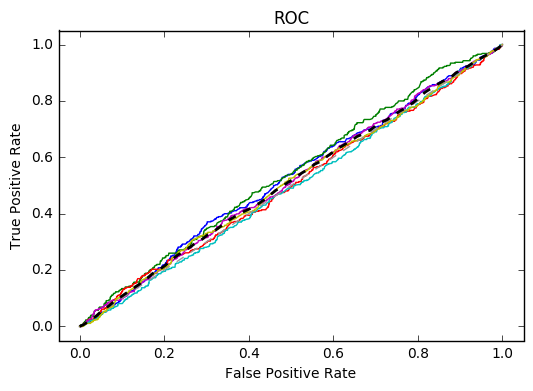

In [244]:
from sklearn.metrics import roc_auc_score

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []
for i, (train, test) in enumerate(cv):
    probas_ = model.fit(X.ix[list(train)], y[train]).predict_proba(X.ix[list(test)])
    # Compute ROC curve and area the curve
   
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
#plt.legend(loc="right")
plt.show()

In [396]:
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
names=pML.columns


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

In [ ]:
pUK.sort(columns=['popNorm'],ascending=False)

In [ ]:
d2['74743']

Notes
------
Given the huge number of nodes 

In [ ]:
graph_edges=pd.DataFrame(G.data("MATCH (m)-[r]->(n) RETURN m.mid,n.mid"))
edges=list(zip(graph_edges['m.mid'].tolist(),graph_edges['n.mid'].tolist()))

In [7]:
with open(data+'alikesb.csv','r') as file:
    doc=file.readlines()

In [5]:
import csv

In [1]:
doc=csv.reader(open(data+'alikesb.csv','r'))

NameError: name 'csv' is not defined

In [ ]:
G=nx.Graph()
for row in doc:
    G.add_nodes_from(row)
    G.add_edge(row[0],row[1])

In [ ]:
partitions1 = community.best_partition(G)
partitions = [(k, v) for k, v in partitions1.items()]

In [ ]:


sorted_partitions = sorted(partitions, key=lambda tup: tup[1])
communities = groupby(sorted_partitions, key=lambda tup: tup[1])

mod = community.modularity(partitions1,G)



In [ ]:
# Plot, color nodes using community structure
values = [partitions1.get(node) for node in G.nodes()]
nx.draw_spring(G2, cmap=plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)
plt.show()

In [ ]:
comm={}
for c, u in communities:
    print(c)
    u = list(u)
    u = [y[0] for y in u]
    comm[c] = u
    print('Community %s has %s members\n' % (c, len(u)))
   

In [ ]:
#invert dictionary
peeps={}
for key in comm.keys():
    people=comm[key]
    for p in people:
        peeps[p]=key

In [ ]:
comm_ethnic={}
for key in comm.keys():
    l=[]
    for p in comm[key]:
        eth=d[p]['ethnic']
        l.append(eth)
    comm_ethnic[key]=l

comm_age={}

for key in comm.keys():
    l=[]
    for p in comm[key]:
        age=d[p]['age']
        l.append(age)
    comm_age[key]=(np.mean(l),np.sqrt(np.var(l)))

In [ ]:
comm_age_ethnic={}
for key in comm.keys():
    comm_age_ethnic[key]={}
    for p in comm[key]:

        typ=d[p]['ethnic']
        if typ in comm_age_ethnic[key].keys():
            age=d[p]['age']
            l.append(age)
        else:
            age=d[p]['age']
            l=[age]
        comm_age_ethnic[key][typ]=l
    for typ in comm_age_ethnic[key].keys():
        comm_age_ethnic[key][typ]=(np.mean(comm_age_ethnic[key][typ]),np.sqrt(np.var(comm_age_ethnic[key][typ])))
    comm_age_ethnic[key]['allStats']=comm_age[key]
            

In [ ]:
comm_age_ethnic_gender={}
for key in comm.keys():
    comm_age_ethnic_gender[key]={}
    for p in comm[key]:

        typ=d[p]['ethnic']
        g=d[p]['gender']
        if g=='F':
            if 'F' not in comm_age_ethnic_gender[key].keys():
                comm_age_ethnic_gender[key]['F']={}
            if typ in comm_age_ethnic_gender[key]['F'].keys():
                age=d[p]['age']
                l.append(age)
            else:
                age=d[p]['age']
                l=[age]
               
                
            comm_age_ethnic_gender[key]['F'][typ]=l
        else:
            if 'M' not in comm_age_ethnic_gender[key].keys():
                
                comm_age_ethnic_gender[key]['M']={}
                
            
            
            if typ in comm_age_ethnic_gender[key]['M'].keys():
                age=d[p]['age']
                l.append(age)
            else:
                age=d[p]['age']
                l=[age]

            comm_age_ethnic_gender[key]['M'][typ]=l 

                   
    for gen in comm_age_ethnic_gender[key].keys():
        for typ in comm_age_ethnic_gender[key][gen].keys():
            l=[ll for ll in comm_age_ethnic_gender[key][gen][typ] if type(ll)==int]
            comm_age_ethnic_gender[key][gen][typ]=(np.mean(l),np.sqrt(np.var(l)))
        #comm_age_ethnic_gender[key][gen]['allStats']=comm_age[key][gen]
          

In [ ]:
comm_age_ethnic_gender

In [ ]:
comm_avg_pop={}

for key in comm.keys():
    typ=Counter()
    comm_avg_pop[key]={}
    for p in comm[key]:
        if p in pUK.index:
            popularity=pUK.ix[p]['popNorm']
            age=d[p]['age']
            eth=d[p]['ethnic']
            g=d[p]['gender']
            sm=pUK.ix[p]['SM']
            ld=pUK.ix[p]['LD']
            likes=pUK.ix[p]['likes']
            ldLen=pUK.ix[p]['LDlen']
            smLen=pUK.ix[p]['SMlen']
            typ[eth]+=1
            if g in comm_avg_pop[key].keys():
                comm_avg_pop[key][g]['SM'].append(sm)
                comm_avg_pop[key][g]['LD'].append(ld)
                comm_avg_pop[key][g]['ldLen'].append(ldLen)
                comm_avg_pop[key][g]['smLen'].append(smLen)
            else:
                comm_avg_pop[key][g]={}
                comm_avg_pop[key][g]['SM']=[sm]
                comm_avg_pop[key][g]['LD']=[ld]
                comm_avg_pop[key][g]['ldLen']=[ldLen]
                comm_avg_pop[key][g]['smLen']=[smLen]
                    
                
                
            
            
            
            
            
            
    
    

In [ ]:
#get top words in each community

In [2]:
#get women SM and LD for each community and then for the men
SM={}
for c in comm.keys():
    SM[c]={}
    for p in comm[p]:
        if dUK[p]['gender']=='M':
            if 'M' in SM[c].keys():
                SM[c]['M']=SM[c]['M']+' '+dUK[p]['SM']
            else:
                SM[c]['M']=dUK[p]['SM']
        else:
            if 'F' in SM[c].keys():
                SM[c]['F']=SM[c]['F']+' '+dUK[p]['SM']
            else:
                SM[c]['F']=dUK[p]['SM']

NameError: name 'comm' is not defined